In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
from Post_utils import *
from multi_exec import *
import dill

###  load data settings

In [3]:
datapath = '/home/xiangli/projects/tmpdata/GCN/GraphSaint/'

working_dir = './res_step0_all_in_one/'
prepare_data_folder = working_dir + 'prepare_data/'
img_path = working_dir + 'result/'

core_par_sampler = 1
samples_per_processor = -(-200 // core_par_sampler) # round up division
eval_train_every = 5  # period to record the train loss

### ================ Start to do flexible settings according to different dataset: 
# read the total epoch number from the yml file to determine the mini_epoch_num and eval_train_every
data_name = 'Flickr'
train_config_yml = './table2/flickr2_e.yml'
multilabel_tag = False

# data_name = 'PPI_small'
# train_config_yml = './table2/ppi2_e.yml'


tune_param_name = 'mini_epoch_num'
tune_val_label_list = [5] 
tune_val_list = [val for val in tune_val_label_list]

snapshot_period = 5   # period when to take a snapshot of the model for validation later

# refer to the yml file to decide the training period:
model_epoch_list = list(range(snapshot_period, 16, snapshot_period))    # snapshot epoch list for validation

trainer_list = list(range(1))

### prepare data

In [4]:
# =============== Step1 *** prepare for the batches, models, model_evaluation
train_params, train_phases, train_data, arch_gcn = train_setting(data_name, datapath, train_config_yml)

prepare(working_dir, train_data, train_params, arch_gcn)
train_phase_file_name = prepare_data_folder + 'model_train_phase'
with open(train_phase_file_name, "wb") as fp:
    dill.dump(train_phases, fp)

/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/22_clusterGCN_custom_hpc/gold_all_in_one/base_exec.py:39: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  train_config = yaml.load(f_train_config)


Loading training data..
Done loading training data..
adj train type is: <class 'scipy.sparse.csr.csr_matrix'>; and shape is (89250, 89250)
adj train type is: <class 'scipy.sparse.csr.csr_matrix'>; and shape is (89250, 89250)


### Training process

In [5]:
# ============== Step2 *** conduct the training process
train_input_file_name = prepare_data_folder + 'model_train_input'
with open(train_input_file_name, "rb") as fp:
    minibatch, model = dill.load(fp)


train_phase_file_name = prepare_data_folder + 'model_train_phase'
with open(train_phase_file_name, "rb") as fp:
    train_phases = dill.load(fp)

for tune_val_label, tune_val in zip(tune_val_label_list, tune_val_list):
    for trainer_id in trainer_list:
        execute_train_investigate(img_path, working_dir, train_phases, model, minibatch, eval_train_every, 
                                  tune_param_name, tune_val_label, tune_val, trainer_id = trainer_id,
                                  snapshot_every = snapshot_period, mini_epoch_num = 5, multilabel = multilabel_tag, 
                                  core_par_sampler = core_par_sampler, samples_per_processor = samples_per_processor)


START PHASE    0
Epoch    1, Batch ID 0


/home/xiangli/projects/GCN_program/largescale_GCN/HPC_version_GCN/22_clusterGCN_custom_hpc/gold_all_in_one/utils.py:248: RuntimeWarning: divide by zero encountered in true_divide
  norm_diag = sp.dia_matrix((1/D,0),shape=diag_shape)  # offset is 0


Epoch    2, Batch ID 0
Epoch    3, Batch ID 0
Epoch    4, Batch ID 0
Epoch    5, Batch ID 0
Epoch    1, Batch ID 1
Epoch    2, Batch ID 1
Epoch    3, Batch ID 1
Epoch    4, Batch ID 1
Epoch    5, Batch ID 1
Epoch    1, Batch ID 2
Epoch    2, Batch ID 2
Epoch    3, Batch ID 2
Epoch    4, Batch ID 2
Epoch    5, Batch ID 2
Epoch    1, Batch ID 3
Epoch    2, Batch ID 3
Epoch    3, Batch ID 3
Epoch    4, Batch ID 3
Epoch    5, Batch ID 3
Epoch    1, Batch ID 4
Epoch    2, Batch ID 4
Epoch    3, Batch ID 4
Epoch    4, Batch ID 4
Epoch    5, Batch ID 4
Epoch    1, Batch ID 5
Epoch    2, Batch ID 5
Epoch    3, Batch ID 5
Epoch    4, Batch ID 5
Epoch    5, Batch ID 5
Epoch    1, Batch ID 6
Epoch    2, Batch ID 6
Epoch    3, Batch ID 6
Epoch    4, Batch ID 6
Epoch    5, Batch ID 6
Epoch    1, Batch ID 7
Epoch    2, Batch ID 7
Epoch    3, Batch ID 7
Epoch    4, Batch ID 7
Epoch    5, Batch ID 7
Epoch    6, Batch ID 0
Epoch    7, Batch ID 0
Epoch    8, Batch ID 0
Epoch    9, Batch ID 0
Epoch   10,

### Investigate validation

In [6]:
# ================ Step3*** investigate validation:
evaluation_input_file_name = prepare_data_folder + 'model_eval_input'
with open(evaluation_input_file_name, "rb") as fp:
    minibatch_eval, model_eval = dill.load(fp)

for tune_val_label, tune_val in zip(tune_val_label_list, tune_val_list):
    for trainer_id in trainer_list:
        execute_validation_investigate(img_path, working_dir, minibatch_eval, model_eval, model_epoch_list, 
                                tune_param_name, tune_val_label, tune_val, trainer_id = trainer_id)



during the evaluation step, report the input matrices size: 
adj_subgraph size :  torch.Size([89250, 89250]); 	 feat_subg size : torch.Size([89250, 500])
during the evaluation step, report the input matrices size: 
adj_subgraph size :  torch.Size([89250, 89250]); 	 feat_subg size : torch.Size([89250, 500])
during the evaluation step, report the input matrices size: 
adj_subgraph size :  torch.Size([89250, 89250]); 	 feat_subg size : torch.Size([89250, 500])


### Investigate test

In [7]:

# ================= Step4*** investigate test:
evaluation_input_file_name = prepare_data_folder + 'model_eval_input'
with open(evaluation_input_file_name, "rb") as fp:
    minibatch_eval, model_eval = dill.load(fp)

for tune_val_label, tune_val in zip(tune_val_label_list, tune_val_list):
    for trainer_id in trainer_list:
        execute_test_tuning(img_path, working_dir, minibatch_eval, model_eval, model_epoch_list, 
                                tune_param_name, tune_val_label, tune_val, trainer_id = trainer_id)

during the evaluation step, report the input matrices size: 
adj_subgraph size :  torch.Size([89250, 89250]); 	 feat_subg size : torch.Size([89250, 500])


### Post processing

Start summarizing for dataset : Flickr
Start running training for dataset: Flickr


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

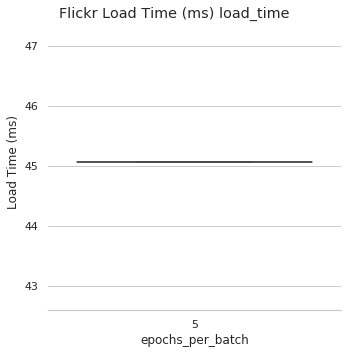

In [8]:
for tune_val_label, tune_val in zip(tune_val_label_list, tune_val_list):
    for trainer_id in trainer_list:
        step51_run_investigation_summarize_whole(data_name, img_path,
                                         tune_param_name, tune_val_label, tune_val,
                                            trainer_list, model_epoch_list)
    
for tune_val_label, tune_val in zip(tune_val_label_list, tune_val_list):
    for trainer_id in trainer_list:
        step50_run_tune_summarize_whole(data_name, img_path, 
                                    tune_param_name, tune_val_label_list, tune_val_list,
                                    trainer_list)